In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from scipy.signal import find_peaks

In [ ]:
file_path = "/content/drive/MyDrive/Bản sao của data for AI team.xlsx"
sheet_name = "Heart rate 2"
df1 = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
def convert_into_datetime(df):
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
  return df

df1 = convert_into_datetime(df1)
df1

,timestamp,heartValue
0,2023-06-30 02:32:59,97
1,2023-06-30 02:54:40,80
2,2023-06-30 02:56:34,93
3,2023-06-30 02:57:22,67
4,2023-06-30 03:00:00,77
...,...,...
3554,2023-07-28 09:56:00,72
3555,2023-07-28 09:57:15,73
3556,2023-07-28 10:01:22,66
3557,2023-07-28 10:06:08,82


In [ ]:
def data_while_sleeping(df, day, month):
  df_sleep_1 = df[(df['timestamp'].dt.month == month) & (df['timestamp'].dt.day == day) & (df['timestamp'].dt.hour >= 22)]
  df_sleep_2 = df[(df['timestamp'].dt.month == month) & (df['timestamp'].dt.day == (day+1)) & (df['timestamp'].dt.hour < 6)]
  df_sleep = pd.concat([df_sleep_1, df_sleep_2], axis=0)
  return df_sleep

df_sleep = data_while_sleeping(df1, 27, 7)
df_sleep

,timestamp,heartValue
3423,2023-07-27 22:46:00,74
3424,2023-07-27 23:01:17,81
3425,2023-07-27 23:15:26,79
3426,2023-07-27 23:55:36,74
3427,2023-07-28 00:06:05,67
...,...,...
3490,2023-07-28 05:35:18,82
3491,2023-07-28 05:40:15,84
3492,2023-07-28 05:45:23,79
3493,2023-07-28 05:50:11,80


In [ ]:
file_path = "/content/drive/MyDrive/Bản sao của data for AI team.xlsx"
sheet_name = "Sleep 2"
df2 = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
def convert_into_datetime_2(df):
  df['sleepTime']= pd.to_datetime(df['sleepTime'], unit='ms')
  df['wakeTime']= pd.to_datetime(df['wakeTime'], unit='ms')
  return df

df2 = convert_into_datetime_2(df2)
df2

,sleepTime,wakeTime,sleLine
0,2023-06-09 11:08:00,2023-06-09 12:00:00,0111111111111111200000000000000000000000222120...
1,2023-06-30 05:43:59,2023-06-30 06:24:59,01111111111111111000000000000000000000000
2,2023-07-03 16:38:59,2023-07-03 17:21:59,0111111111111111211000000000000000000000002
3,2023-07-03 17:24:59,2023-07-03 17:59:59,01111111111111111000000000000000100
4,2023-07-03 18:09:59,2023-07-03 18:45:59,011111111111111111100000000000000000
5,2023-07-03 18:54:59,2023-07-03 19:51:59,0111111111111111200000000000000000000000000000...
6,2023-07-03 19:54:59,2023-07-03 20:36:59,011111111111111121000000000000000000000000
7,2023-07-03 20:40:59,2023-07-03 21:36:59,0111111111111111200000000000000000000000000000...
8,2023-07-03 21:40:59,2023-07-03 22:21:59,01111111111111111000000000000000002200000
9,2023-07-05 05:45:59,2023-07-05 06:25:59,0111111111111111100000000000000000000000


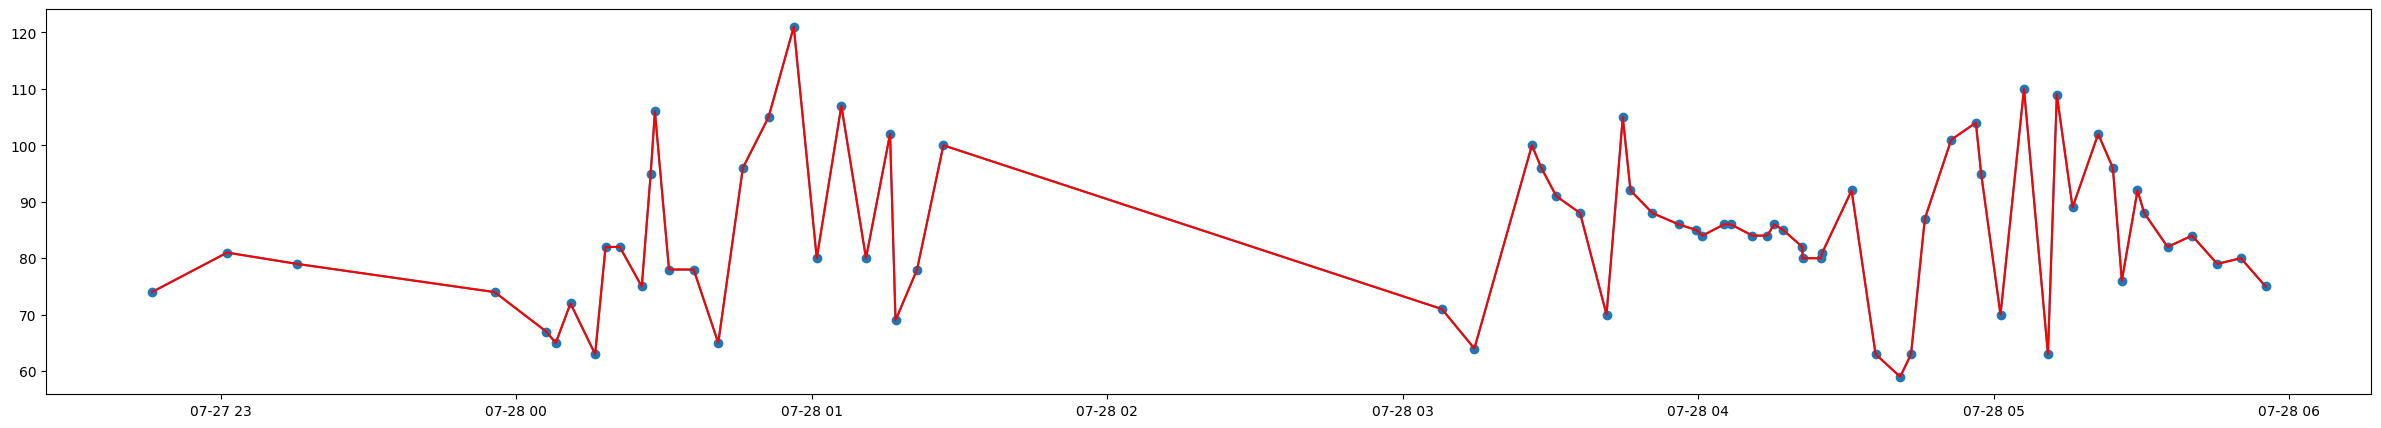

In [ ]:
# Plot data points
plt.figure(figsize=(30, 5))
plt.plot(df_sleep['timestamp'], df_sleep['heartValue'], marker='o', label='Dữ liệu')
plt.plot(df_sleep['timestamp'], df_sleep['heartValue'], 'r-', label='Xu hướng')
plt.show()

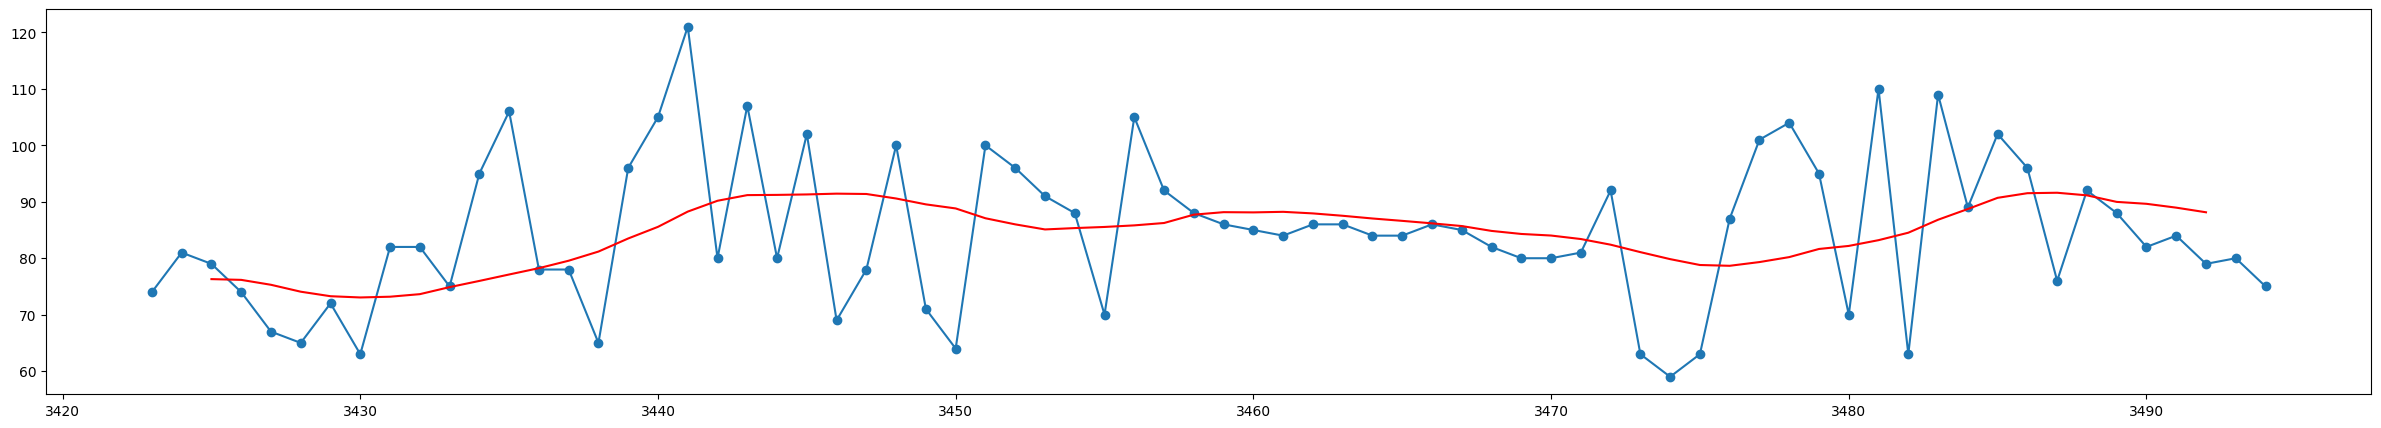

In [ ]:
def getTrendLine(df):
    smooth_df = df['heartValue'].rolling(10, min_periods=1).mean()
    decompose_df = seasonal_decompose(smooth_df.dropna(), model='multiplicative', period=5)
    trend_df = decompose_df.trend
    return trend_df

# Plot trendline
trend_df = getTrendLine(df_sleep)
plt.figure(figsize=(30, 5))
plt.plot(df_sleep.index, df_sleep['heartValue'], marker='o', label='Dữ liệu gốc')
plt.plot(df_sleep.index, trend_df, 'r-', label='Đường trung bình động')
plt.show()

In [ ]:
# Checking Null
trend_df.isna()

3423     True
3424     True
3425    False
3426    False
3427    False
        ...  
3490    False
3491    False
3492    False
3493     True
3494     True
Name: trend, Length: 72, dtype: bool

In [ ]:
# Fill the NaN
trend_df.fillna(trend_df.mean(), inplace=True)

<ipython-input-12-2d67b3c639ec>:12: RankWarning: Polyfit may be poorly conditioned
  coefficients_poly2, errors2 = fit(x, y, i+1)


The best degree of function:  5
The coefficients:  [-1.91384412e-10  2.64897597e-06 -1.14577101e-02  1.60008600e-03
  1.37170214e+05 -3.79700720e+08  3.28444956e+11]
The errors:  1.9225400264679442


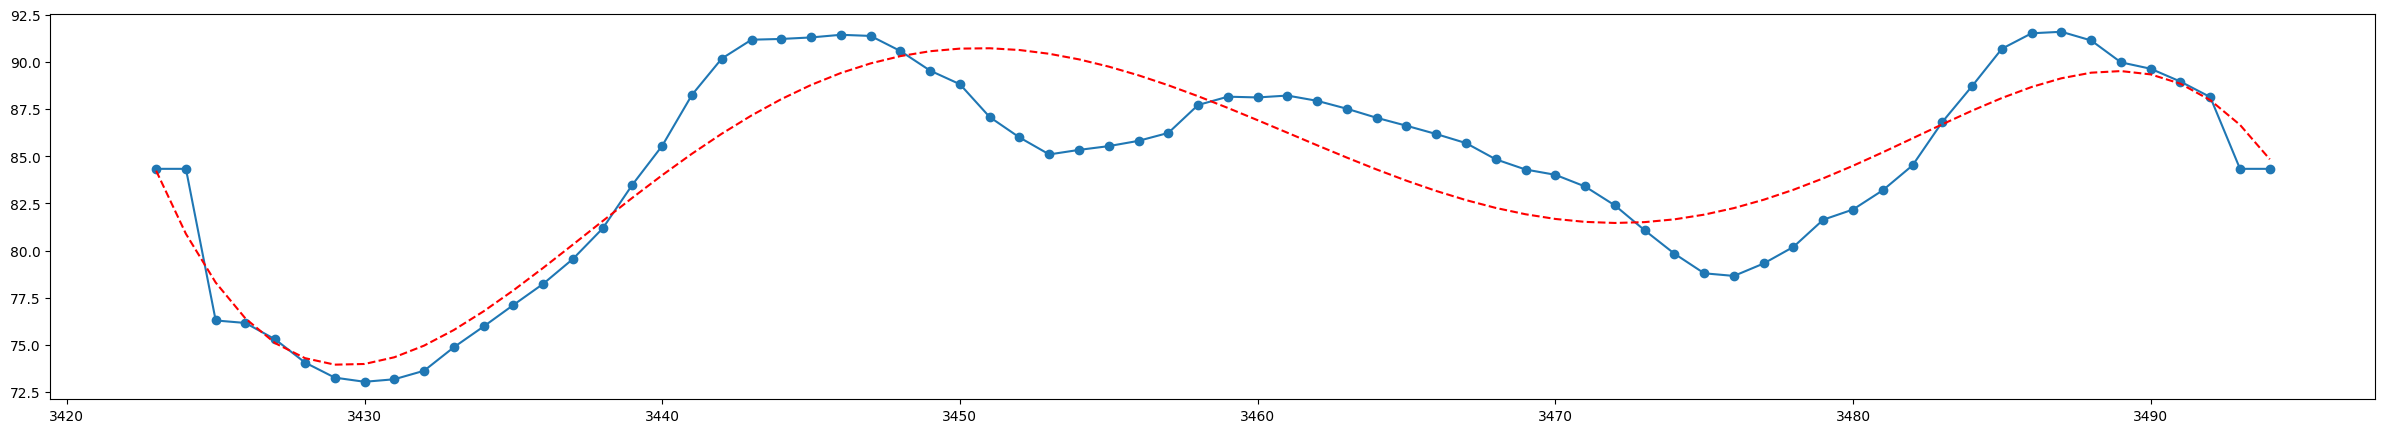

In [ ]:
# Find the best fit trendline
def fit(x, y, i):
  coefficients_poly = np.polyfit(x, y, i)
  line_fit_poly = np.polyval(coefficients_poly, x)
  errors = abs(y - line_fit_poly)
  return coefficients_poly, errors.mean()

def find_best(x, y):
  min = float('inf')
  for i in range(1, 20):
    coefficients_poly1, errors1 = fit(x, y, i)
    coefficients_poly2, errors2 = fit(x, y, i+1)
    if (errors1 < errors2):
      min = errors1
      coeff = coefficients_poly1
      degree = i
    else:
      min = errors2
      coeff = coefficients_poly2
      degree = i
    if abs(errors2 - errors1) < 1e-3:
        return coeff, min, degree
  return coeff, min, degree

x = df_sleep.index
y = trend_df
coefficients_poly, errors, degree = find_best(x, y)
line_fit_poly = np.polyval(coefficients_poly, x)
print("The best degree of function: ", degree)
print("The coefficients: ", coefficients_poly)
print("The errors: ", errors)

# Plot
plt.figure(figsize=(30, 5))
plt.plot(x, y, marker='o', label='Data')
plt.plot(x, line_fit_poly, 'r--', label='Trendline')
plt.show()

the number extreme point:  4


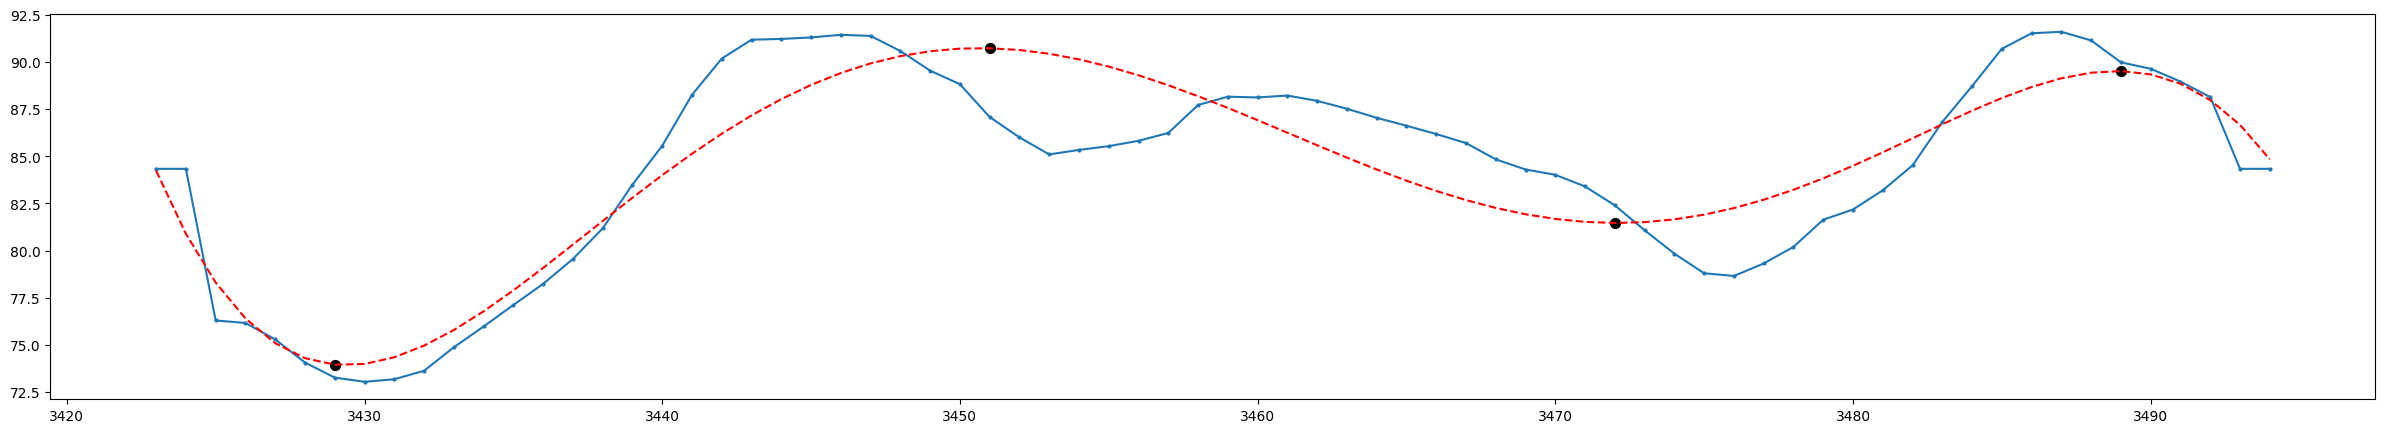

In [ ]:
# Calculate the number peak of the trendline
x_inverted = -line_fit_poly
peaks1, _ = find_peaks(line_fit_poly)
peaks2, _ = find_peaks(x_inverted)
print("the number extreme point: ", len(peaks1)+len(peaks2))

plt.figure(figsize=(30, 5))
plt.plot(x, y, marker='o', markersize=2 , label='Data')
plt.plot(x, line_fit_poly, 'r--', label='Trendline')
plt.scatter(x[peaks1], line_fit_poly[peaks1], c='black', marker='o', s=50)
plt.scatter(x[peaks2], line_fit_poly[peaks2], c='black', marker='o', s=50)
plt.show()

<ipython-input-14-cf29e915a414>:59: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-14-cf29e915a414>:59: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)


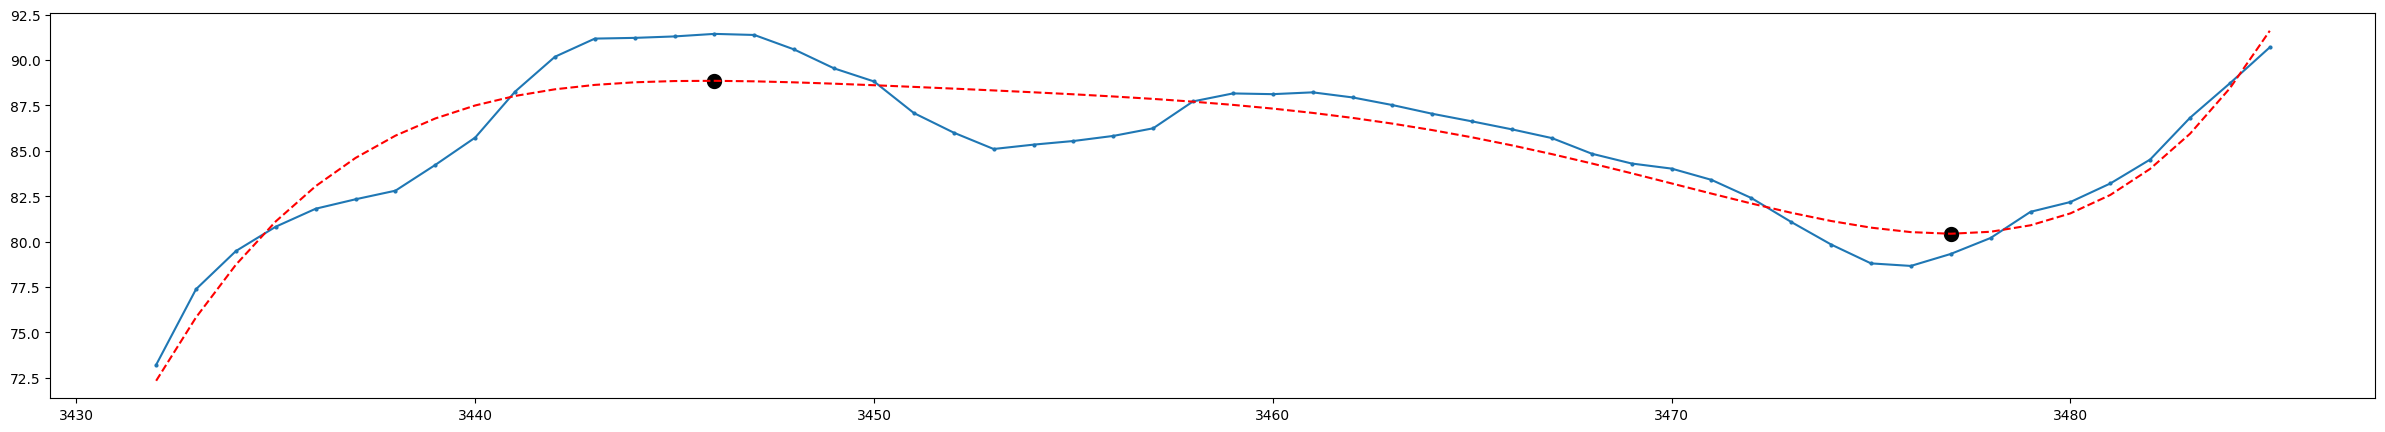

{'the_best_degree': 7, 'the_coefficients': array([ 5.07320992e-14, -5.76326155e-10,  1.47217154e-06,  4.49881277e-03,
       -1.55391316e+01, -6.09740963e+04,  2.85116995e+08, -3.00017918e+11]), 'the_errors': 1.3158208500112534, 'the_number_extreme_point': 2}


In [ ]:
def find_trendline(df):

  #remove 10% data
  rows_to_remove = int(0.1 * len(df))
  df = df.iloc[rows_to_remove:-rows_to_remove]

  #find trendline
  smooth_df = df['heartValue'].rolling(10, min_periods=1).mean()
  decompose_df = seasonal_decompose(smooth_df.dropna(), model='multiplicative', period=5)
  trend_df = decompose_df.trend
  trend_df = trend_df.dropna()

  #find coefficient
  x = trend_df.index
  y = trend_df

  degree = 1
  coefficients = np.polyfit(x, y, 1)
  line_fit_poly = np.polyval(coefficients, x)
  min_error = abs(y - line_fit_poly).mean()

  for i in range(2, 20):
    coefficients_cur = np.polyfit(x, y, i)
    line_fit_poly_cur = np.polyval(coefficients_cur, x)
    error = abs(y - line_fit_poly_cur).mean()
    if (error < min_error):
      min_temp = min_error
      degree = i
      coefficients = coefficients_cur
      line_fit_poly = line_fit_poly_cur
      min_error = error
      if abs(min_error - min_temp) < 1e-3:
        break

  #calculate the number peak of the trendline
  x_inverted = -line_fit_poly
  peaks1, _ = find_peaks(line_fit_poly)
  peaks2, _ = find_peaks(x_inverted)
  num_peak = len(peaks1)+len(peaks2)

  the_dict = {
    "the_best_degree": degree,
    "the_coefficients": coefficients,
    "the_errors": min_error,
    "the_number_extreme_point": num_peak
  }

  #draw trendline
  plt.figure(figsize=(30, 5))
  plt.plot(x, y, marker='o', markersize=2 , label='Data')
  plt.plot(x, line_fit_poly, 'r--', label='Trendline')
  plt.scatter(x[peaks1], line_fit_poly[peaks1], c='black', marker='o', linewidths=5)
  plt.scatter(x[peaks2], line_fit_poly[peaks2], c='black', marker='o', linewidths=5)
  plt.show()

  print(the_dict)
  return the_dict

the_dict = find_trendline(df_sleep)

<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:51: RankWarning: Polyfit may be poorly conditioned
  the_dict = find_trendline(df_sleep)
<ipython-input-17-a78c49ccf072>:

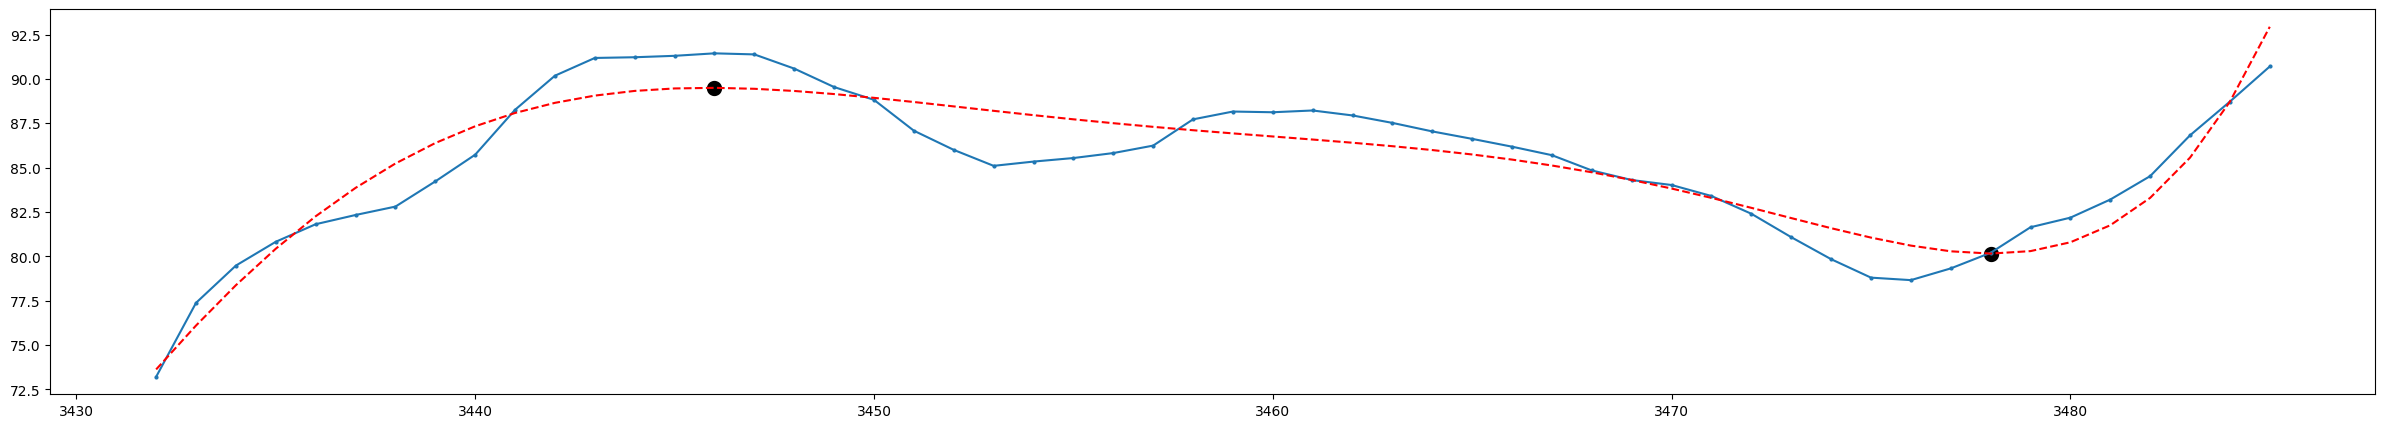

{'the_best_degree': 15, 'the_coefficients': array([ 1.00922783e-41, -6.25851699e-38, -7.28779047e-35,  3.74275397e-31,
        1.92515524e-27,  3.47405093e-24, -6.42676566e-21, -6.83321085e-17,
       -2.37375552e-13, -2.79840448e-10,  1.67703209e-06,  1.13588705e-02,
        2.67244526e+01, -6.00293032e+04, -6.30467887e+08,  1.20646275e+12]), 'the_errors': 1.2573956323945468, 'the_number_extreme_point': 2}


In [ ]:
def find_trendline(df):
    # Remove 10% data
    rows_to_remove = int(0.1 * len(df))
    df = df.iloc[rows_to_remove:-rows_to_remove]

    # Find trendline
    smooth_df = df['heartValue'].rolling(10, min_periods=1).mean()
    decompose_df = seasonal_decompose(smooth_df.dropna(), model='multiplicative', period=5)
    trend_df = decompose_df.trend.dropna()

    # Find the best polynomial degree
    x = trend_df.index
    y = trend_df
    min_error = np.inf
    best_coefficients = None
    best_degree = 1

    for i in range(1, 20):
        coefficients_cur = np.polyfit(x, y, i)
        line_fit_poly_cur = np.polyval(coefficients_cur, x)
        error = abs(y - line_fit_poly_cur).mean()
        if error < min_error:
            min_error = error
            best_degree = i
            best_coefficients = coefficients_cur

    # Calculate the number of peaks of the trendline
    x_inverted = -np.polyval(best_coefficients, x)
    peaks1, _ = find_peaks(np.polyval(best_coefficients, x))
    peaks2, _ = find_peaks(x_inverted)
    num_peak = len(peaks1) + len(peaks2)

    # Draw trendline
    plt.figure(figsize=(30, 5))
    plt.plot(x, y, marker='o', markersize=2 , label='Data')
    plt.plot(x, np.polyval(best_coefficients, x), 'r--', label='Trendline')
    plt.scatter(x[peaks1], np.polyval(best_coefficients, x)[peaks1], c='black', marker='o', linewidths=5)
    plt.scatter(x[peaks2], np.polyval(best_coefficients, x)[peaks2], c='black', marker='o', linewidths=5)
    plt.show()

    the_dict = {
        "the_best_degree": best_degree,
        "the_coefficients": best_coefficients,
        "the_errors": min_error,
        "the_number_extreme_point": num_peak
    }

    print(the_dict)
    return the_dict

the_dict = find_trendline(df_sleep)